# PySESync: SE-Sync Python bindings 🐍

This notebook demonstrates the use of SE-Sync's Python bindings

In [1]:
import sys
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import collections as mc
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import matplotlib.animation as animation

%matplotlib notebook

Import the SE-Sync Python library built using pybind

In [2]:
import PySESync

Load in some data from a .g2o file

In [3]:
filename = "../../data/intel.g2o"
#filename = "../../data/parking-garage.g2o"


measurements, num_poses = PySESync.read_g2o_file(filename)

d = measurements[0].R.shape[0]

print("Loaded %d measurements between %d %d-dimensional poses from file %s" % (len(measurements), num_poses, d, filename))

Loaded 2512 measurements between 1728 2-dimensional poses from file ../../data/intel.g2o


### Run SE-Sync!

Set SE-Sync options

In [4]:
opts = PySESync.SESyncOpts()
opts.num_threads = 4
opts.verbose=True

opts.r0 = d
opts.formulation = PySESync.Formulation.Explicit    # Options are Simplified or Explicit
opts.initialization = PySESync.Initialization.Random   # Options are Chordal or Random

# Termination criteria
opts.rel_func_decrease_tol = 1e-6
opts.min_eig_num_tol = 1e-3
opts.max_time = 900

# We will record the sequence of iterates generated by the SE-Sync algorithm as it runs,
# in order to generate an animation of the solution process
opts.log_iterates = True


# Save the solution animation to a video file?
save_animation = False

Run SE-Sync!

In [5]:
result = PySESync.SESync(measurements, opts)

Constructing SE-Sync problem instance ... elapsed computation time: 0.015 seconds

========= SE-Sync ==========

ALGORITHM SETTINGS:

SE-Sync settings:
 SE-Sync problem formulation: Explicit
 Initial level of Riemannian staircase: 2
 Maximum level of Riemannian staircase: 10
 Tolerance for accepting an eigenvalue as numerically nonnegative in optimality verification: 0.001
 LOBPCG block size: 4
 LOBPCG preconditioner maximum fill factor: 3
 LOBPCG preconditioner drop tolerance: 0.001
 Maximum number of LOBPCG iterations for escape direction computation: 100
 Initialization method: random
 Logging entire sequence of Riemannian Staircase iterates
 Running SE-Sync with 4 threads

Riemannian trust-region settings:
 Stopping tolerance for norm of Riemannian gradient: 0.01
 Stopping tolerance for norm of preconditioned Riemannian gradient: 0.0001
 Stopping tolerance for relative function decrease: 1e-06
 Stopping tolerance for the norm of an accepted update step: 0.001
 Maximum number of tru

Iter:   33, time: 1.260e-01, f:  8.104e+05, |g|: 6.757e+03, |M^{-1}g|: 7.718e+03, Delta: 5.960e+01, inner iters:     8, |h|: 7.714e+01, |h|_M: 5.960e+01, df:  2.965e+04, rho:  9.939e-01. Step accepted
Iter:   34, time: 1.340e-01, f:  7.807e+05, |g|: 2.046e+03, |M^{-1}g|: 2.034e+03, Delta: 1.490e+02, inner iters:    23, |h|: 5.251e+01, |h|_M: 1.490e+02, df:  7.903e+02, rho:  1.329e-01. Step accepted
Iter:   35, time: 1.530e-01, f:  7.799e+05, |g|: 2.429e+03, |M^{-1}g|: 2.030e+03, Delta: 1.490e+02, inner iters:    15, |h|: 3.089e+01, |h|_M: 4.691e+01, df:  4.344e+03, rho:  9.865e-01. Step accepted
Iter:   36, time: 1.650e-01, f:  7.756e+05, |g|: 5.110e+02, |M^{-1}g|: 3.667e+02, Delta: 1.490e+02, inner iters:    28, |h|: 5.306e+01, |h|_M: 1.490e+02, df: -1.106e+03, rho: -9.410e-01. Step REJECTED!
Iter:   37, time: 1.870e-01, f:  7.756e+05, |g|: 5.110e+02, |M^{-1}g|: 3.667e+02, Delta: 3.725e+01, inner iters:    17, |h|: 1.427e+01, |h|_M: 3.725e+01, df:  4.448e+02, rho:  9.760e-01. Step acc

Norm of preconditioned Riemannian gradient: 2.392e+00
Total elapsed computation time: 1.751e+00 seconds


Found first-order critical point with value F(Y) = 772736!  Elapsed computation time: 1.751 seconds

Checking second order optimality ... 
Saddle point detected! Curvature along escape direction: -41.8658.  Elapsed computation time: 0.007 seconds (1 LOBPCG iterations).


====== RIEMANNIAN STAIRCASE (level r = 3) ======

Truncated-Newton trust-region optimization: 

Iter:    0, time: 0.000e+00, f:  7.727e+05, |g|: 4.334e+01, |M^{-1}g|: 5.936e+01, Delta: 1.000e+00, inner iters:     1, |h|: 4.908e+00, |h|_M: 1.000e+00, df:  3.441e+02, rho:  9.941e-01. Step accepted
Iter:    1, time: 4.000e-03, f:  7.724e+05, |g|: 1.086e+03, |M^{-1}g|: 1.346e+04, Delta: 2.500e+00, inner iters:     0, |h|: 1.719e+01, |h|_M: 2.500e+00, df:  1.875e+04, rho:  9.315e-01. Step accepted
Iter:    2, time: 7.000e-03, f:  7.536e+05, |g|: 6.687e+03, |M^{-1}g|: 8.712e+04, Delta: 6.250e+00, inner iters:     0, |h|:

Iter:   39, time: 3.170e-01, f:  1.539e+02, |g|: 1.399e+02, |M^{-1}g|: 5.321e+02, Delta: 1.455e+01, inner iters:    10, |h|: 8.758e+00, |h|_M: 1.643e+00, df:  2.347e+01, rho:  1.070e+00. Step accepted
Iter:   40, time: 3.290e-01, f:  1.304e+02, |g|: 3.003e+01, |M^{-1}g|: 7.245e+01, Delta: 1.455e+01, inner iters:    58, |h|: 1.647e+02, |h|_M: 1.455e+01, df: -4.810e+02, rho: -3.293e+01. Step REJECTED!
Iter:   41, time: 3.840e-01, f:  1.304e+02, |g|: 3.003e+01, |M^{-1}g|: 7.245e+01, Delta: 3.638e+00, inner iters:    12, |h|: 2.768e+01, |h|_M: 3.638e+00, df: -1.839e-01, rho: -2.277e-02. Step REJECTED!
Iter:   42, time: 3.970e-01, f:  1.304e+02, |g|: 3.003e+01, |M^{-1}g|: 7.245e+01, Delta: 9.095e-01, inner iters:     5, |h|: 6.034e+00, |h|_M: 9.095e-01, df:  3.233e+00, rho:  1.075e+00. Step accepted
Iter:   43, time: 4.060e-01, f:  1.272e+02, |g|: 3.112e+01, |M^{-1}g|: 5.682e+01, Delta: 2.274e+00, inner iters:     7, |h|: 1.608e+01, |h|_M: 2.274e+00, df:  3.639e+00, rho:  7.471e-01. Step ac


Checking second order optimality ... 
Found second-order critical point! Elapsed computation time: 0.006 seconds.


===== END RIEMANNIAN STAIRCASE =====

Found global optimum!

Rounding solution ... elapsed computation time: 0 seconds

SDP RESULTS:
Value of dual SDP solution F(Y): 52.3482
Norm of Riemannian gradient grad F(Y): 0.000824568
Value of primal SDP solution tr(Lambda): 52.3487
SDP duality gap: -0.00046428

SE-SYNCHRONIZATION RESULTS:
Value of rounded pose estimates F(x): 52.3482
Suboptimality bound F(x) - tr(Lambda) of recovered pose estimate: -0.00046428

Total elapsed computation time: 2.741 seconds

===== END SE-SYNC =====



## Plot some interesting data about the solution process

<IPython.core.display.Javascript object>


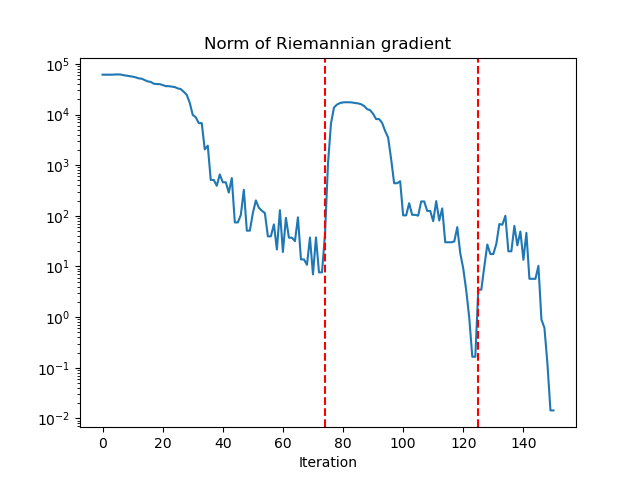

In [6]:
# Plot sequence of Riemannian gradient norms
fig, ax = plt.subplots()
grad_norms = np.concatenate(result.gradient_norms)
plt.semilogy(grad_norms)

# Set the following flag to "True" in order to draw red vertical 
# lines indicating iterations at which the relaxation rank 
# increased in the Riemannian Staircase
show_rank_increases = True

if show_rank_increases and len(result.gradient_norms) > 1:
    steps = np.cumsum([len(l) for l in result.gradient_norms[:-1]])
    for i in steps:
        plt.axvline(x=i, ymin=0, ymax=np.log10(grad_norms.max()), color='red', linestyle='--')

plt.title("Norm of Riemannian gradient")
plt.xlabel("Iteration")

plt.show()

<IPython.core.display.Javascript object>


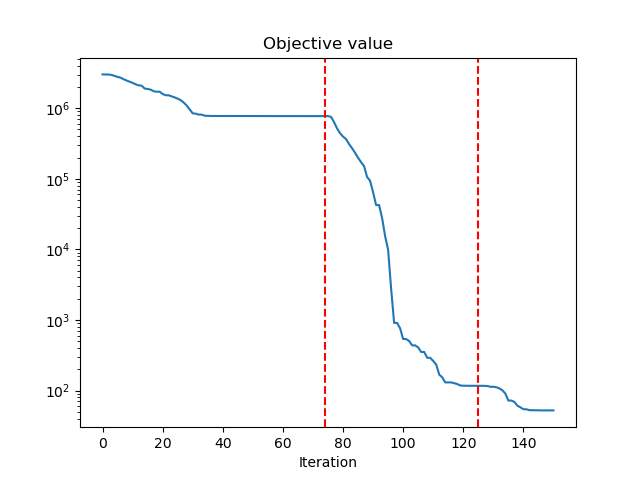

In [7]:
# Plot sequence of objective values
fig, ax = plt.subplots()
fvals = np.concatenate(result.function_values)
plt.semilogy(fvals)

# Set the following flag to "True" in order to draw red vertical 
# lines indicating iterations at which the relaxation rank 
# increased in the Riemannian Staircase
show_rank_increases = True

if show_rank_increases and len(result.function_values) > 1:
    steps = np.cumsum([len(l) for l in result.function_values[:-1]])
    for i in steps:
        plt.axvline(x=i, ymin=0, ymax=np.log10(fvals.max()), color='red', linestyle='--')


plt.title("Objective value")
plt.xlabel("Iteration")
plt.show()

### Plot estimated SLAM solution

Define some useful functions for visualizing SLAM solution

In [8]:
# Given a list of position estimates and a collection of measurements, this function constructs a list of
# pairs of the form (ti, tj), where ti and tj are the endpoints of a relative pose measurement
def construct_line_segments(t, measurements):
    lines = []
    
    for m in measurements:
        lines.append((t[:,m.i], t[:,m.j]))
    
    return lines

# Given an SESyncProblem instance, a low-rank factor Y for an estimated SDP solution X = YY', this function
# returns the rounded (projected) position estimates t
def get_rounded_position_estimates(prob, Y):
    # Get problem dimensions
    d = prob.dimension()
    n = prob.num_states()
    
    # Get relaxtion rank for the passed estimate Y
    r = Y.shape[0]
    
    # Compute rounded pose estimates
    xhat = prob.round_solution(Y)
    
    # Extract rotational and translational parts
    R0 = xhat[:, n : n + d]
    R0inv = R0.transpose()
    return np.matmul(R0inv, xhat[:, 0:n])

Plot the final SLAM estimate

<IPython.core.display.Javascript object>


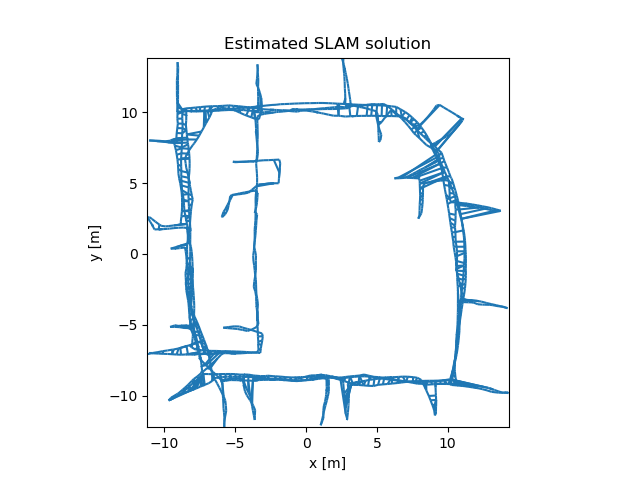

In [9]:
# Extract translational states from solution xhat
xhat = result.xhat
R0inv = np.linalg.inv(xhat[:, num_poses : num_poses + d])
t = np.matmul(R0inv, xhat[:, 0:num_poses])

# Construct set of inter-pose measurements at the estimated robot positions
lines = construct_line_segments(t, measurements)

# Determine dimension of problem

# Plot the estimated solution
fig = plt.figure()

if d == 2:
    ax = plt.gca()
    ax.set_xlim(t[0, :].min(), t[0, :].max())
    ax.set_ylim(t[1, :].min(), t[1, :].max())
    ax.set_xlabel("x [m]")
    ax.set_ylabel("y [m]")
    
    lc = mc.LineCollection(lines)
    ax.add_collection(lc)
    ax.set_aspect('equal')

else:
    # d == 3
    ax = fig.add_subplot(projection='3d')
    ax.set_xlim(t[0, :].min(), t[0, :].max())
    ax.set_ylim(t[1, :].min(), t[1, :].max())
    ax.set_zlim(t[2, :].min(), t[2, :].max())
    ax.set_xlabel("x [m]")
    ax.set_ylabel("y [m]")
    ax.set_zlabel("z [m]")
    
    lc = Line3DCollection(lines)
    ax.add_collection3d(lc)
    ax.set_box_aspect((1,1,1))

plt.title("Estimated SLAM solution")
plt.show()

### Generate a video of the solution process

Compute rounded position estimates for each iterate generated during the entire optimization

In [10]:
# Construct SE-Sync problem instance
prob = PySESync.SESyncProblem(measurements, opts.formulation, opts.projection_factorization, \
                              opts.preconditioner, opts.reg_Chol_precon_max_cond)

# Record maximum and minimum x- and y- values of each estimated position; we will use these later
# to set the figure axis ranges
xmax = -float('inf')
xmin = float('inf')
ymax = -float('inf')
ymin = float('inf')
zmax = -float('inf')
zmin = float('inf')


# Construct a list of line collections, one for each estimated (rounded) solution
solns = []
for Ys in result.iterates:
    for Y in Ys:
        # Get rounded position estimates
        t = get_rounded_position_estimates(prob, Y)
        
        # Update maximum and minimum x- and y- values
        xmax = max(xmax, t[0, :].max())
        xmin = min(xmin, t[0, :].min())
        ymax = max(ymax, t[1, :].max())
        ymin = min(ymin, t[1, :].min())
        
        if d == 3:
            # Also record zmax and zmin values
            zmax = max(zmax, t[2, :].max())
            zmin = min(zmin, t[2, :].min())

        # Calculate the set of segments for this solution
        solns.append(construct_line_segments(t, measurements))

Render visualization!

<IPython.core.display.Javascript object>


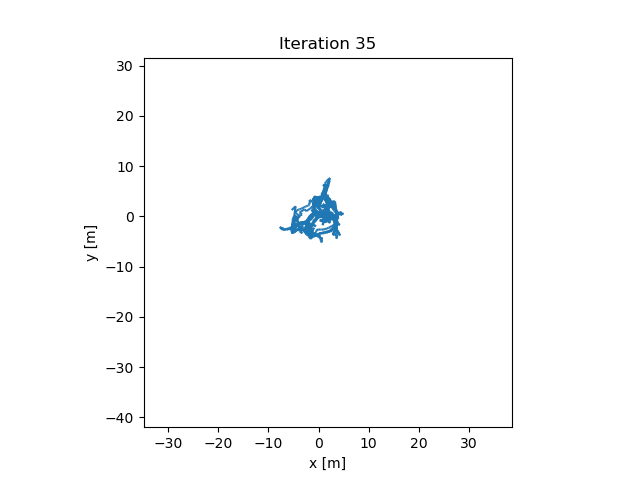

In [11]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()

if d == 2:
    # Construct set of 2D axes
    ax = plt.axes(xlim=(xmin, xmax), ylim=(ymin, ymax))
    ax.set_xlabel("x [m]")
    ax.set_ylabel("y [m]")
    ax.set_aspect('equal')

    # Initialize line collection and add it to the figure
    lc = mc.LineCollection([])
    ax.add_collection(lc)
    
else:
    # Construct set of 3D axes
    ax = fig.add_subplot(projection='3d')
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_zlim(zmin, zmax)
    ax.set_xlabel("x [m]")
    ax.set_ylabel("y [m]")
    ax.set_zlabel("z [m]")
    ax.set_box_aspect((1,1,1))
    
    # Initialize line collection and add it to the figure
    lc = Line3DCollection([])
    ax.add_collection3d(lc)
    


# Initialization function: plot the background of each frame
def init():
    lc.set_segments([])
    return lc

# Animation function.  This is called sequentially
def update(i):
    lc.set_segments(solns[i])
    ax.set_title("Iteration %d" % i)
    return lc

# Call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, update, init_func=init, frames=len(solns), interval=67)

if save_animation:
    # Save this animation to disk
    writer = animation.FFMpegWriter(fps = 15, codec='ffv1')
    anim.save('SESync.avi', writer=writer)